In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA 
%matplotlib inline

In [84]:
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data']],
                     columns= iris['feature_names'])
df.head()

#we want to predict petal width

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [90]:
len(df)

150

In [86]:
df["sepal_petal_length"] = df["sepal length (cm)"] * df["petal length (cm)"]
df[""]
df["petal_length_sq"] = df["petal length (cm)"] ** 2
#df = df.drop("sepal_both",axis=1)

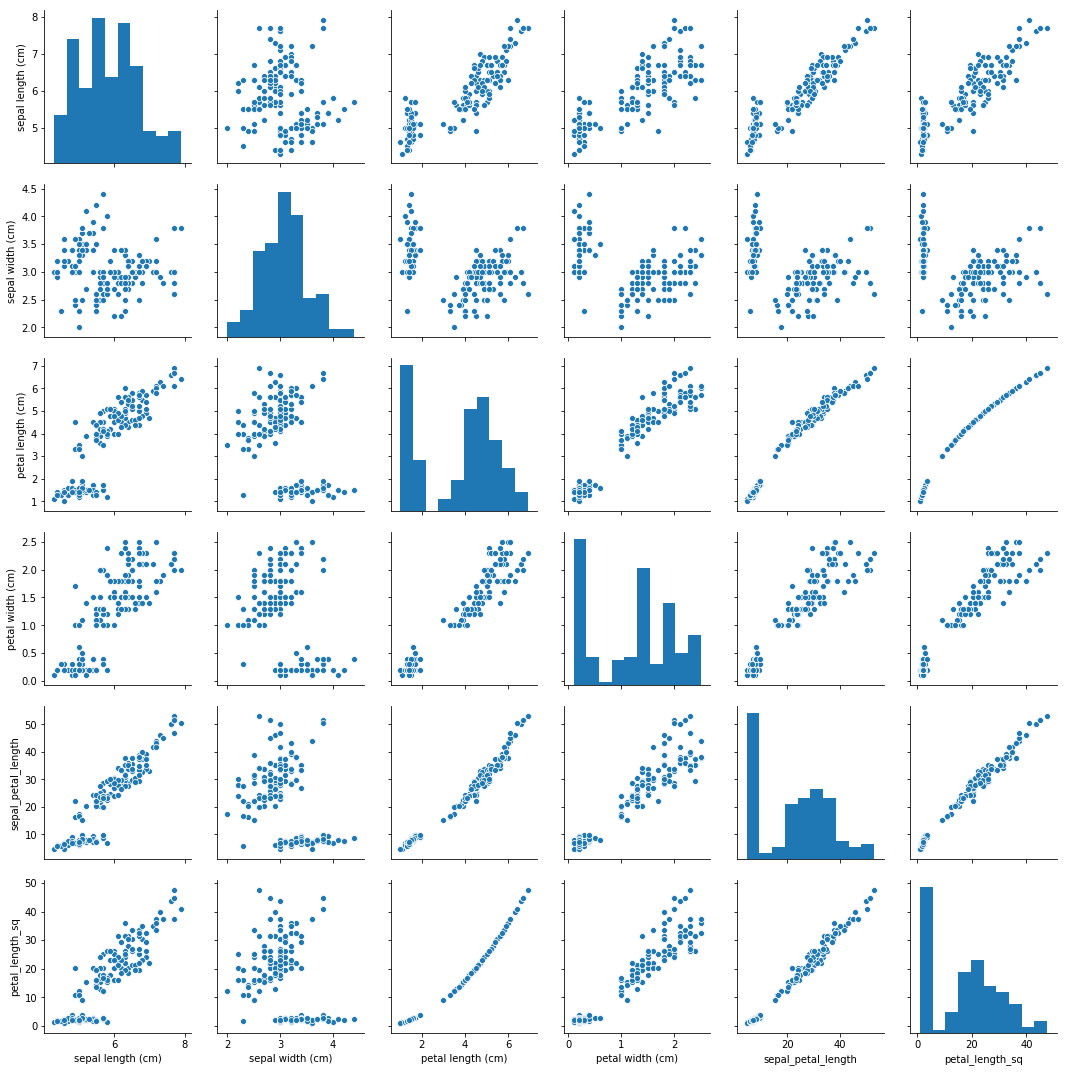

In [87]:
sns.pairplot(df)

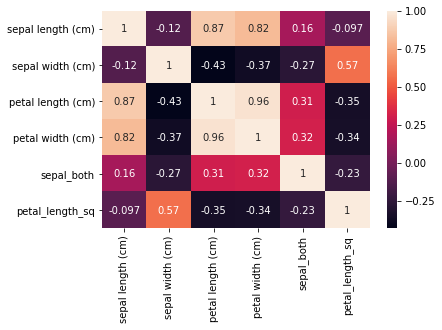

In [46]:
sns.heatmap(df.corr(), annot=True)

In [67]:
# we need to solve the linearaity problem

pca = PCA(n_components=3)
X = df[['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)', 'sepal_petal_length', 'petal_length_sq']]
X_pca = pca.fit_transform(X)

In [82]:
#linear regression

from sklearn import linear_model
regr = linear_model.LinearRegression()
Y = df["petal width (cm)"].values.reshape(-1, 1)

X = X_pca

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=.2)

print(regr.fit(X_train, y_train).score(X_test, y_test))

print(regr.fit(X, Y).score(X, Y))

0.926466605079
0.922947225791


In [91]:
#KNN
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=5)
X = X_pca
Y = df["petal width (cm)"].values.reshape(-1, 1)
knn.fit(X, Y)

from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

#weighted
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights="distance")
knn_w.fit(X,Y)

score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.30 (+/- 0.86)
Weighted Accuracy: 0.30 (+/- 0.90) 0.201092179897


In [92]:
#We were able to get a better model for this data with the linear regression. The dataset is not that big and that could be why the KNN
#was not performing that well. We added the weights to see if that would help the model, but we only got a slight improvement
#in the variance. 
#With this smaller dataset, the linear regression won out. 